In [95]:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, FeatureType, OverwritePermission, \
    LoadTask, SaveTask, EOExecutor, ExtractBandsTask, MergeFeatureTask
from eolearn.io.processing_api import SentinelHubInputTask
from eolearn.core import LoadFromDisk, SaveToDisk, AddFeature, RemoveFeature
from eolearn.visualization import EOPatchVisualization
from eolearn.mask import AddValidDataMaskTask

from eolearn.features import SimpleFilterTask, NormalizedDifferenceIndexTask

from eolearn.geometry import VectorToRaster
import geopandas as gpd
import os
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import sentinelhub as sh
from sentinelhub import UtmZoneSplitter, BBox, CRS, DataCollection

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
config = sh.SHConfig()
config.sh_client_id= r'9bd0a46d-3d5b-4dc0-98b5-546b3635f9f3'
config.sh_client_secret = r'~)x%O:RiSc|F5i+SIL}^fZUlWOa.;E^{_:&!J6@:'
config.save()

In [3]:
path = r'C:\Users\FEEL\geospatial_datasets\LUCAS_2018_Copernicus\LUCAS_2018_Copernicus'


In [4]:
gdf = gpd.read_file(os.path.join(path,"LUCAS_2018_Copernicus_polygons.shp"))
csv = pd.read_csv(os.path.join(path,"LUCAS_2018_Copernicus_attributes.csv")) 

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

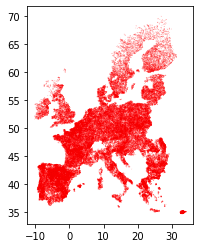

In [5]:
gdf.plot(edgecolor='r',facecolor='b')

In [6]:
portugal_csv = csv.loc[csv["NUTS0"] == "PT"]
gdf.POINT_ID = gdf.POINT_ID.astype(int)
portugal_gdf = portugal_csv.merge(gdf, on='POINT_ID', how='inner')
portugal_gdf.crs = gdf.crs
portugal_gdf = gpd.GeoDataFrame(portugal_gdf)


C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Testing the intersect-ability of geopandas

In [7]:
from shapely.geometry import Polygon
poly = Polygon([(-8.9,40.20),(-8.9,41.18),(-8.70,40.18),(-8.70,40.20)])
poly1 = gpd.GeoSeries(poly)
df1 = gpd.GeoDataFrame({'geometry':poly1})
df1.crs = gdf.crs
#df1["geom_type"] = gdf.geom_type[1]
#df1["is_valid"] = gdf.is_valid[1]
#poly = gpd.GeoDataFrame(poly, crs = portugal_gdf.crs)

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

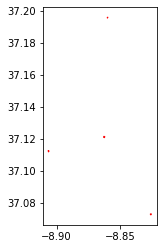

In [8]:
gpd.GeoDataFrame(portugal_gdf[:4]).plot(edgecolor='r')

In [9]:
gpd.overlay(portugal_gdf,df1, how='intersection')

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,POINT_ID,YEAR,NUTS0,NUTS1,NUTS2,NUTS3,TH_LAT,TH_LONG,OFFICE_PI,...,TH_GPS_DIST,FILE_PATH_GISCO_NORTH,FILE_PATH_GISCO_SOUTH,FILE_PATH_GISCO_EAST,FILE_PATH_GISCO_WEST,FILE_PATH_GISCO_POINT,CPRN_LC_SAME_LC1,LUCAS_CORE_INTERSECT,COPERNICUS_CLEANED,geometry
0,49760,27282102,2018,PT,PT1,PT16,PT16E,40.219562,-8.838408,0,...,2.604797,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.83856 40.22003, -8.83784 40.21969..."
1,53343,27302100,2018,PT,PT1,PT16,PT16E,40.206548,-8.810257,0,...,1.179481,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.81030 40.20664, -8.81010 40.20658..."
2,144871,27302106,2018,PT,PT1,PT16,PT16E,40.258972,-8.826112,0,...,3.168190,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.82621 40.25943, -8.82549 40.25909..."
3,436258,27322112,2018,PT,PT1,PT16,PT16E,40.315853,-8.819101,0,...,2.480821,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.81921 40.31631, -8.81849 40.31597..."
4,132863,27362108,2018,PT,PT1,PT16,PT16E,40.289812,-8.762726,0,...,2.023495,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.76286 40.29028, -8.76214 40.28994..."
5,113011,27362116,2018,PT,PT1,PT16,PT16E,40.359714,-8.783869,0,...,0.483155,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.78400 40.36016, -8.78328 40.35982..."
6,116664,27382100,2018,PT,PT1,PT16,PT16E,40.224337,-8.718773,0,...,2.037186,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.71884 40.22449, -8.71867 40.22434..."
7,113071,27382118,2018,PT,PT1,PT16,PT16E,40.381639,-8.766237,0,...,2.520618,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.76635 40.38210, -8.76598 40.38169..."
8,92498,27382124,2018,PT,PT1,PT16,PT16E,40.434060,-8.782131,0,...,1.922115,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.78225 40.43450, -8.78153 40.43416..."
9,34347,27402128,2018,PT,PT1,PT16,PT16E,40.473457,-8.769788,0,...,2.050898,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.e

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

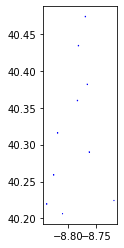

In [10]:
portugal_gdf[portugal_gdf.intersects(df1.geometry[0])].plot(edgecolor='b')
#portugal_gdf = portugal_gdf.buffer(500)

In [17]:
bbox_splitter = sh.BBoxSplitter(portugal_gdf.geometry.to_list(),sh.CRS.WGS84,800)

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
geometry = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter.get_bbox_list()]
bbox_portugal_gdf = gpd.GeoDataFrame(geometry=geometry,crs = portugal_gdf.crs)

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
bbox_portugal_gdf.plot()

KeyError: -1

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-9.541600896202329, -6.045920250528354, 36.765603271579515, 42.40883611930318)

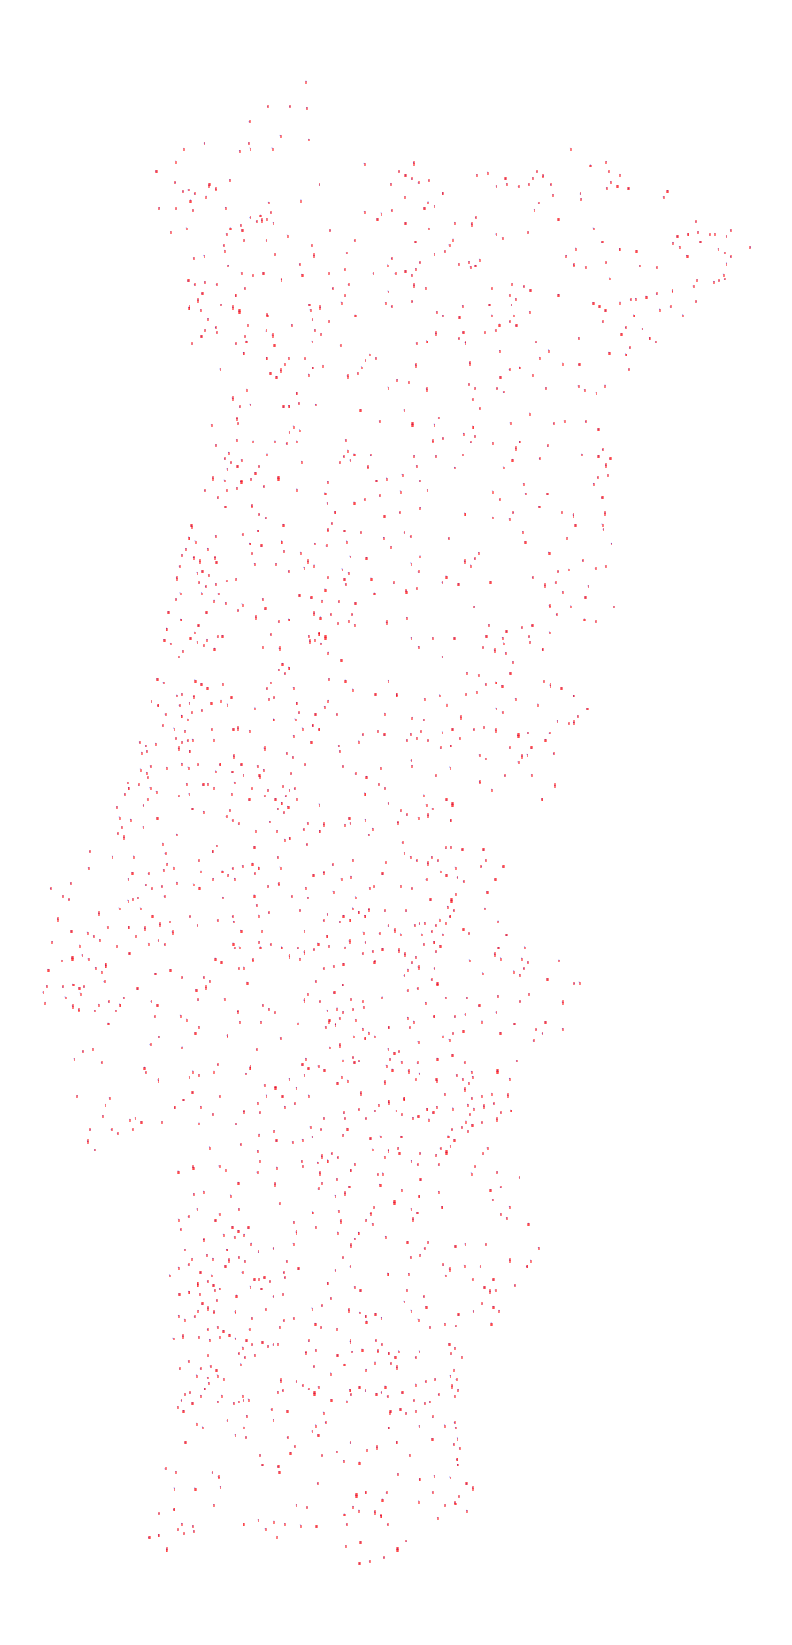

In [19]:
fig, ax = plt.subplots(figsize=(30, 30))
bbox_portugal_gdf.plot(ax=ax,facecolor='w',edgecolor='r',alpha=0.5)
portugal_gdf.plot(ax=ax, facecolor='None',edgecolor='b',alpha=0.5)
plt.axis('off')

# Cont

In [147]:
band_names = ['B02', 'B03', 'B04', 'B08', 'B11', 'B12']
add_data = SentinelHubInputTask(
    bands_feature=(FeatureType.DATA, 'BANDS'),
    bands = band_names,
    resolution=10,
    maxcc=0.8,
    time_difference=datetime.timedelta(minutes=120),
    data_collection=DataCollection.SENTINEL2_L1C,
    max_threads=5,
    config=config,
)
path_out = r'F:\geospatial_datasets\eopatches'
if not os.path.isdir(path_out):
    os.makedirs(path_out)
save = SaveTask(path_out, overwrite_permission=OverwritePermission.OVERWRITE_PATCH)

In [148]:
add_lucas = AddFeature((FeatureType.META_INFO,"LUCAS_DATA"))

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [149]:
workflow = LinearWorkflow(add_data,add_lucas,save)

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [150]:
# Execute the workflow
time_interval = ['2019-01-01', '2019-01-20'] # time interval for the SH request

# define additional parameters of the workflow
execution_args = []
for idx, bbox in enumerate(bbox_splitter.get_bbox_list()):

    execution_args.append({
        add_data:{'bbox': bbox, 'time_interval': time_interval},
        add_lucas:{'data': portugal_gdf[portugal_gdf.intersects(bbox.geometry)]},
        save: {'eopatch_folder': f'eopatch_{idx}'}
    })
executor = EOExecutor(workflow, execution_args, save_logs=True)
executor.run(workers=5, multiprocess=False)

executor.make_report()

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/2336 [00:00<?, ?it/s]

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinat

In [103]:
#add_data.execute(bbox=bbox, time_interval=time_interval)

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


EOPatch(
  data: {
    BANDS: numpy.ndarray(shape=(7, 71, 35, 6), dtype=float32)
  }
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    maxcc: 0.8
    service_type: 'processing'
    size_x: 35
    size_y: 71
    time_difference: datetime.timedelta(seconds=7200)
    time_interval: ('2019-01-01T00:00:00', '2019-01-20T23:59:59')
  }
  bbox: BBox(((-9.374761592658798, 38.95876876467212), (-9.370789228288714, 38.96518152927181)), crs=CRS('4326'))
  timestamp: [datetime.datetime(2019, 1, 3, 11, 40, 30), ..., datetime.datetime(2019, 1, 20, 11, 30, 32)], length=7
)

In [ ]:
workflow.execute(input_args={add_data:(bbox,)})

In [152]:
patch = EOPatch.load(r'F:\geospatial_datasets\eopatches\eopatch_666')

ValueError: x and y can be no greater than 2-D, but have shapes (71,) and (71, 32, 3)

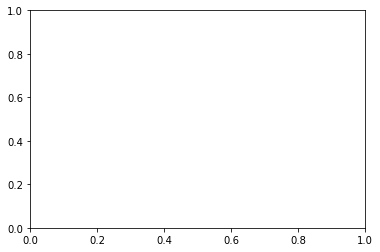

In [167]:
plt.imshow(patch.data["BANDS"][0][..., [2, 1, 0]]*3.5)

In [ ]:
class FilterVectorToRaster(EOTask):
    
    def __init__(eopatch,dataset,featureType,values_column,raster_resolution):
        #this cant be here still, must add the args to the class and call vector2rastertask in the executemethod
        self.eopatch = eopatch
        self.dataset = dataset
        self.featureType = featureType
        self.values_column = values_column
        self.raster_resolution = raster_resolution
    def execute(eopatch):
        self.vector2rastertask = VectorToRaster(self.dataset[self.dataset.intersects(eopatch.bbox)],self.featureType,self.values_column,self.raster_resolution)

        return self.vector2rastertask.execute(eopatch)

In [180]:
load_eopatch = LoadFromDisk(path_out) # in order to add lucas i'd have to wrap the addFeature with a eotask that would get the bbox of the given eopatch; add the intersected points to the metadata as previosuly done
add_lucas_raster =  VectorToRaster(portugal_gdf,(FeatureType.MASK_TIMELESS,"GROUND_TRUTH"),values_column="geometry",raster_resolution=10)
addfeatureWorkflow = LinearWorkflow(load_eopatch,add_lucas,save)
 

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\eolearn\core\core_tasks.py:176: DeprecationWarning: This task is deprecated, use LoadTask instead
  warnings.warn('This task is deprecated, use LoadTask instead', DeprecationWarning)


In [ ]:
for i in os.listdir(path_out)
    eopatch_name = os.path.join(path_out,i)
    eopatch =

In [ ]:
fig, axs = plt.subplots(nrows=700, ncols=50, figsize=(20, 20))

for i, inp in enumerate(bbox_splitter.get_bbox_list()[:50]):
    eopatch = EOPatch.load(f'{path_out}/eopatch_{i}', lazy_loading=True)
    ax = axs[i//700][i%50]
    dates = np.array(eopatch.timestamp)
    ax.imshow(np.clip(eopatch.data['BANDS'][0][..., [2, 1, 0]] * 3.5, 0, 1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("auto")
    del eopatch

fig.subplots_adjust(wspace=0, hspace=0)

(-0.5, 33.5, 70.5, -0.5)

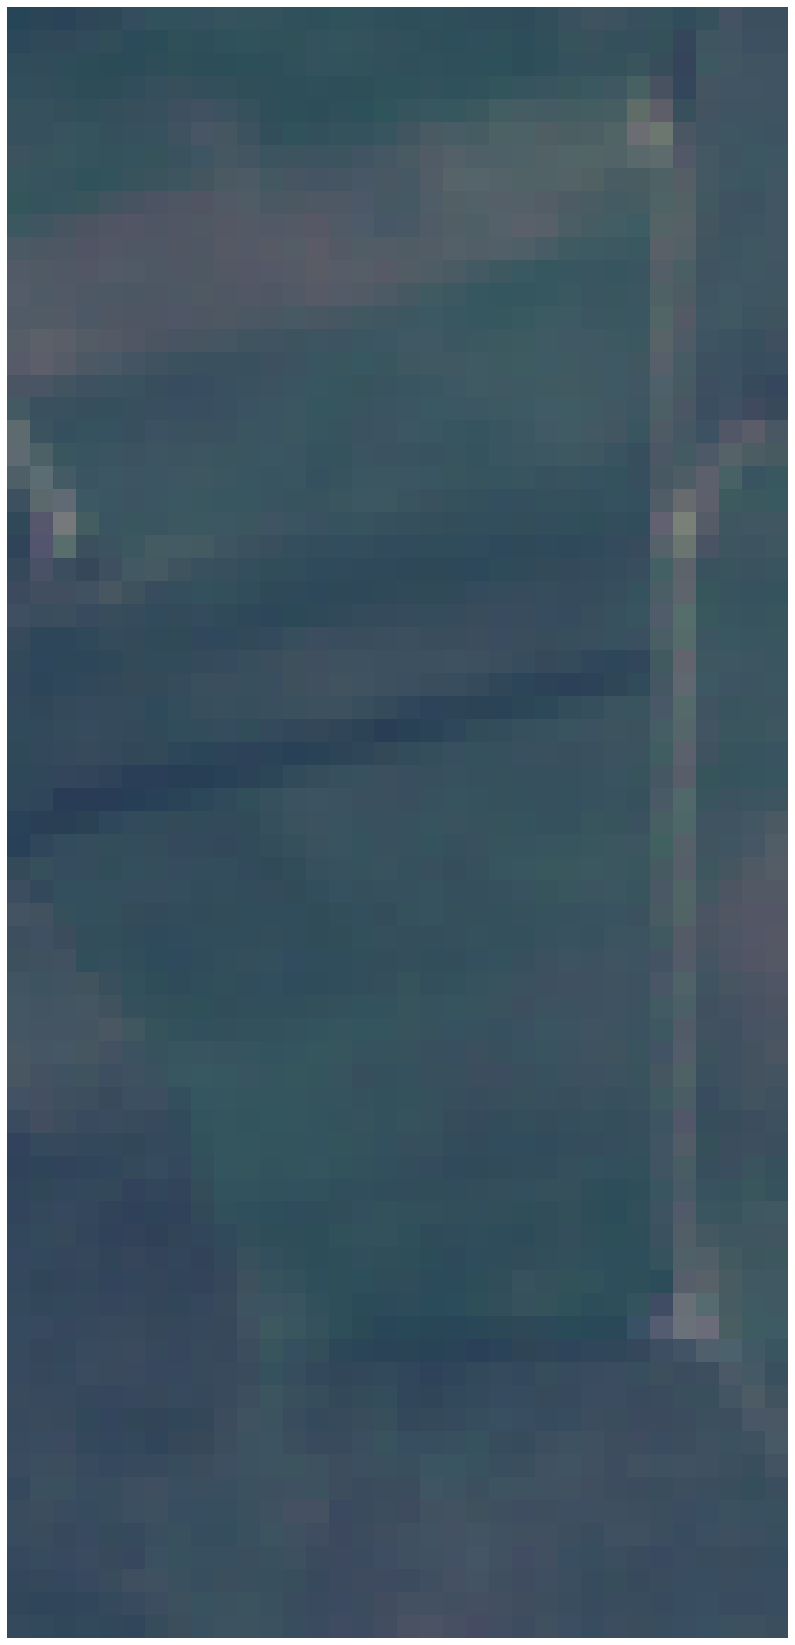

In [70]:
fig, ax = plt.subplots(figsize=(30, 30))
bbox_portugal_gdf.plot(ax=ax,facecolor='w',edgecolor='r',alpha=0.5)
portugal_gdf.plot(ax=ax, facecolor='None',edgecolor='b',alpha=0.5)
for i, inp in enumerate(bbox_splitter.get_bbox_list()[:50]):
    eopatch = EOPatch.load(f'{path_out}/eopatch_{i}', lazy_loading=True)
    ax.imshow(np.clip(eopatch.data['BANDS'][0][..., [2, 1, 0]] * 3.5, 0, 1))
    del eopatch
plt.axis('off')

Add the dataframe with the info of the ground truth
Add the mask to which the info is applied to
Check the result obtained